# ARCFELISMERÉS


OpenCV könyvtár importálása

In [1]:
import cv2

Csatlakozás a Google Drive fiókomhoz

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Kép beolvasása, átméretezése és megjelenítése

In [3]:
image = cv2.imread('/content/drive/MyDrive/Diplomamunka/Images/people1.jpg')

A betöltött kép dimenziója: (1280, 1920, 3)
Betöltött kép kiinduló magassága:  1920
Betöltött kép kiinduló szélessége:  1280
A betöltött kép teljes információmennyisége: 1920 * 1280 *3 = 7372800
átméretezett magasság: 960
átméretezett szélesség: 640
Az átméretezett kép teljes információmennyisége: 960 * 640 *3 = 1843200
Az átméretezett kép dimenziója: (640, 960, 3)


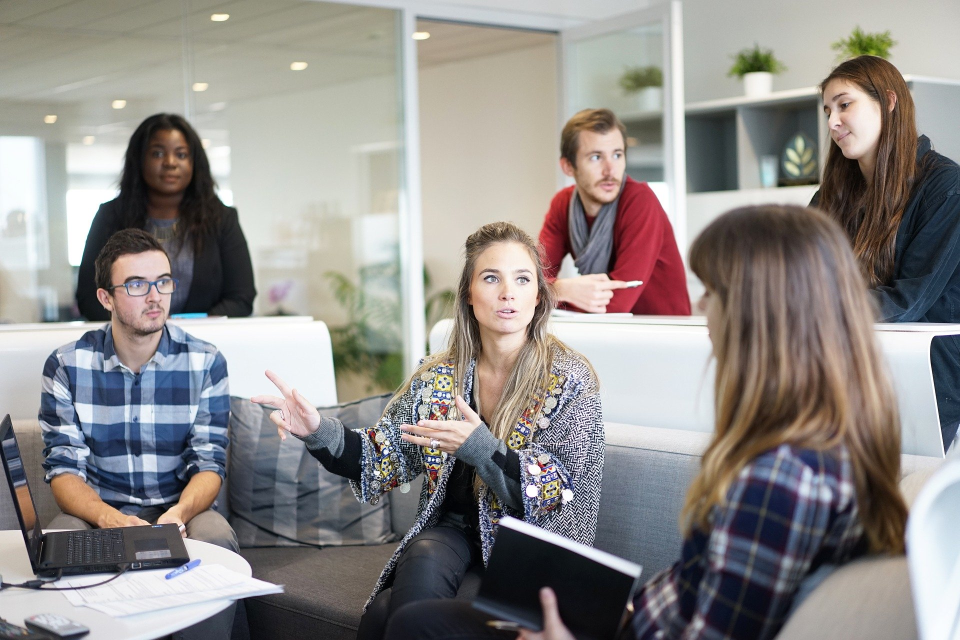

In [4]:
print(f"A betöltött kép dimenziója: {image.shape}")
width, height, channel = image.shape   # mivel a betöltött kép színes ezért 3. (channel) érték 3, ugyanis az adott pixel 3 adatot tartalmaz, a pixel RGB kódját
print('Betöltött kép kiinduló magassága: ', height)
print('Betöltött kép kiinduló szélessége: ', width)
print(f"A betöltött kép teljes információmennyisége: 1920 * 1280 *3 = {height * width * channel}")
resized_height = int(height/2)  #castolás egész számmá, mivel a resize function csak int-el működik
resized_width = int(width/2)  #castolás egész számmá, mivel a resize function csak int-el működik
print(f"átméretezett magasság: {resized_height}")
print(f"átméretezett szélesség: {resized_width}")
print(f"Az átméretezett kép teljes információmennyisége: 960 * 640 *3 = {resized_height * resized_width * channel}")

resized_image = cv2.resize(image, (resized_height, resized_width))
print(f"Az átméretezett kép dimenziója: {resized_image.shape}")

from google.colab.patches import cv2_imshow
cv2_imshow(resized_image)

Kép átalakítása szürkeárnyalatos képpé

A szürkeárnyalatossá alakított kép dimenziója: (640, 960) -> a képnek így már nincs channel értéke


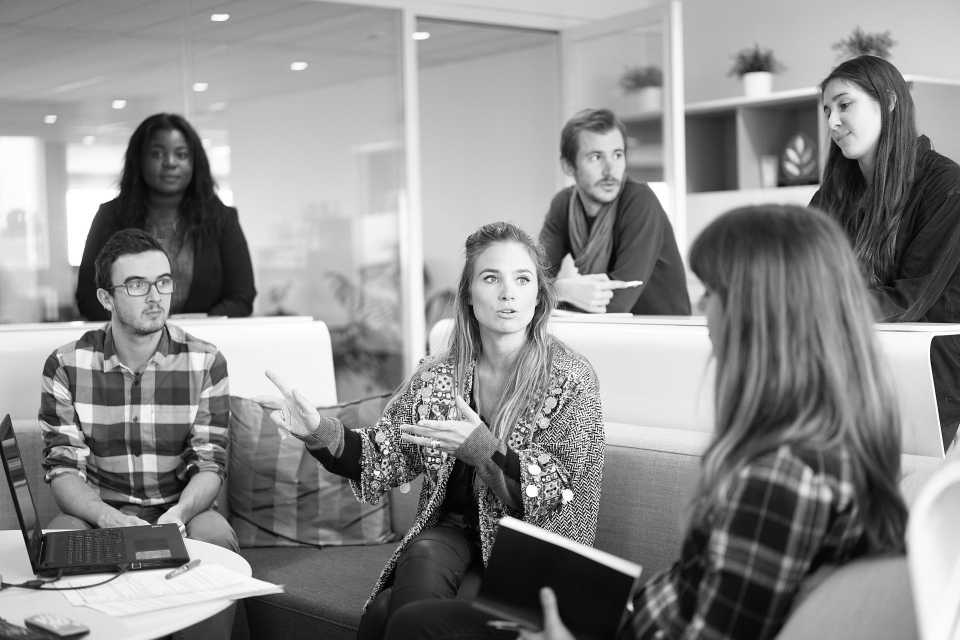

In [5]:
# Az OpenCv könyvtár leghatékonyabb alkalmazása érdekében érdemes a színes képeket szürkeárnyalatossá tenni, mellyel a feldolgozandó információmennyiséget csökkentjük
grayscale_resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
print(f"A szürkeárnyalatossá alakított kép dimenziója: {grayscale_resized_image.shape} -> a képnek így már nincs channel értéke")

cv2_imshow(grayscale_resized_image)

Arcok felismerése a képen

In [6]:
detector = cv2.CascadeClassifier('/content/drive/MyDrive/Diplomamunka/Cascades/cascade_2.xml') # Haar Cascade Classifier betöltése

In [7]:
face_detections = detector.detectMultiScale(grayscale_resized_image, minNeighbors=25, minSize=(70,70))
#a minNeighbors nagyságával növelhető a detekciók minősége, a minSize paraméterrel kiszűrhetőek a kisméretű fals pozitívok

In [8]:
face_detections

array([[810,  68,  89,  89],
       [126, 120,  81,  81],
       [561, 113,  95,  95],
       [ 84, 232, 121, 121],
       [455, 232, 107, 107]], dtype=int32)

In [9]:
print(f"Felismert arcok száma: {len(face_detections)}")

Felismert arcok száma: 5


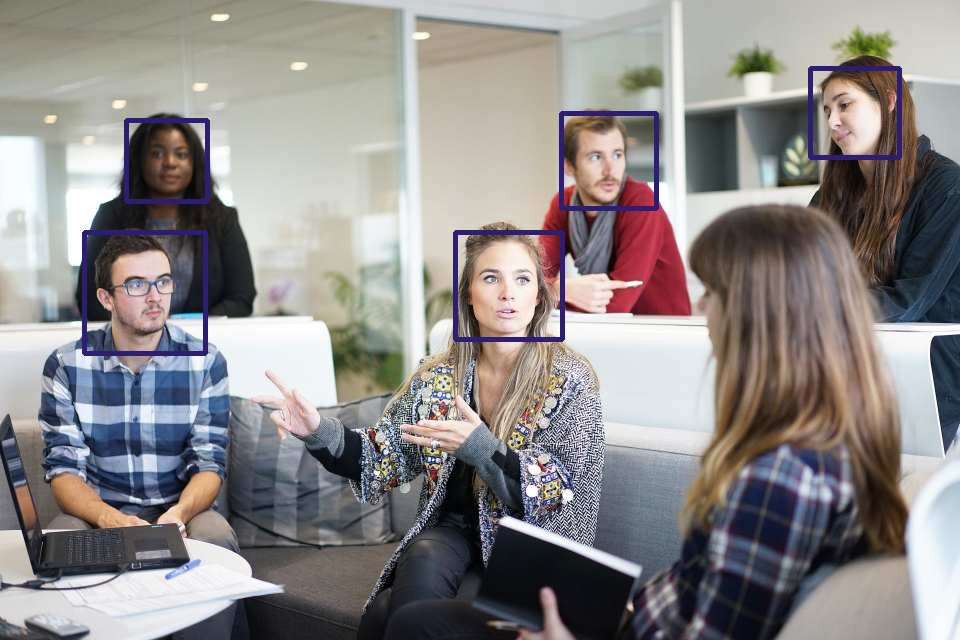

In [10]:
for (x_position,y_position,width,height) in face_detections:
  #print(x_position,y_position,width,height)
  cv2.rectangle(resized_image, (x_position,y_position), (x_position+width, y_position+height), (114, 30, 46), 4  )
cv2_imshow(resized_image)
